In [1]:
import itertools
import json
import math
import os
import sys
from typing import Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
COLS = {
    "sig": "Signature",
    "smiles": "SMILES",
    "ecfp": "ECFP"
}

def create_df(data: Dict, src: str) -> pd.DataFrame:
    del data["total"]
    df_raw = pd.DataFrame(data)

    df_raw.drop(columns=["smiles", "sig_nei"], inplace=True)
    
    # Rename cols
    df_raw.rename(columns=COLS, inplace=True)

    df = pd.DataFrame()
    for col in df_raw.columns:
        df_col = df_raw[col].to_frame()
        df_col["label"] = col
        df_col.rename(columns={col: "count"}, inplace=True)
        df = pd.concat([df, df_col])

    # Create "duplicate"
    df.reset_index(inplace=True)
    df.rename(columns={"index": "duplicate"}, inplace=True)

    # Fmt
    df.fillna(0, inplace=True)
    df["duplicate"] = df["duplicate"].astype(int)
    df["duplicate_log"] = df["duplicate"].apply(lambda x: math.log(x) if x > 0 else 0)
    df["count"] = df["count"].astype(int)
    df["count_log"] = df["count"].apply(lambda x: math.log(x) if x > 0 else 0)

    df["src"] = src

    df = df[df["label"] != "smiles"]
    return df


df = pd.DataFrame()
for i in range(4):
    data = json.load(open("/Users/ggricourt/Documents/database/signature/degeneracy.radius-%s.json" % (i,)))

    # Load data
    df_metanetx = create_df(data=data["metanetx"], src="metanetx")
    df_emolecules = create_df(data=data["emolecules"], src="emolecules")

    df_radius = pd.concat([df_metanetx, df_emolecules])
    
    df_radius["radius"] = i
    df = pd.concat([df, df_radius])
    
df.sort_values(["radius", "duplicate_log"], ascending=[True, True], inplace=True)
df.reset_index(inplace=True, drop=True)

df.to_csv("/Users/ggricourt/Documents/database/signature/degeneracy.csv")
df

,duplicate,count,label,duplicate_log,count_log,src,radius
0,1,76706,Signature,0.000000,11.247735,metanetx,0
1,1,76403,ECFP,0.000000,11.243777,metanetx,0
2,1,3303110,Signature,0.000000,15.010375,emolecules,0
3,1,3267335,ECFP,0.000000,14.999485,emolecules,0
4,2,14119,Signature,0.693147,9.555277,metanetx,0
...,...,...,...,...,...,...,...
1191,11,2,ECFP,2.397895,0.693147,emolecules,3
1192,12,1,Signature,2.484907,0.000000,metanetx,3
1193,12,1,ECFP,2.484907,0.000000,metanetx,3
1194,16,1,Signature,2.772589,0.000000,emolecules,3


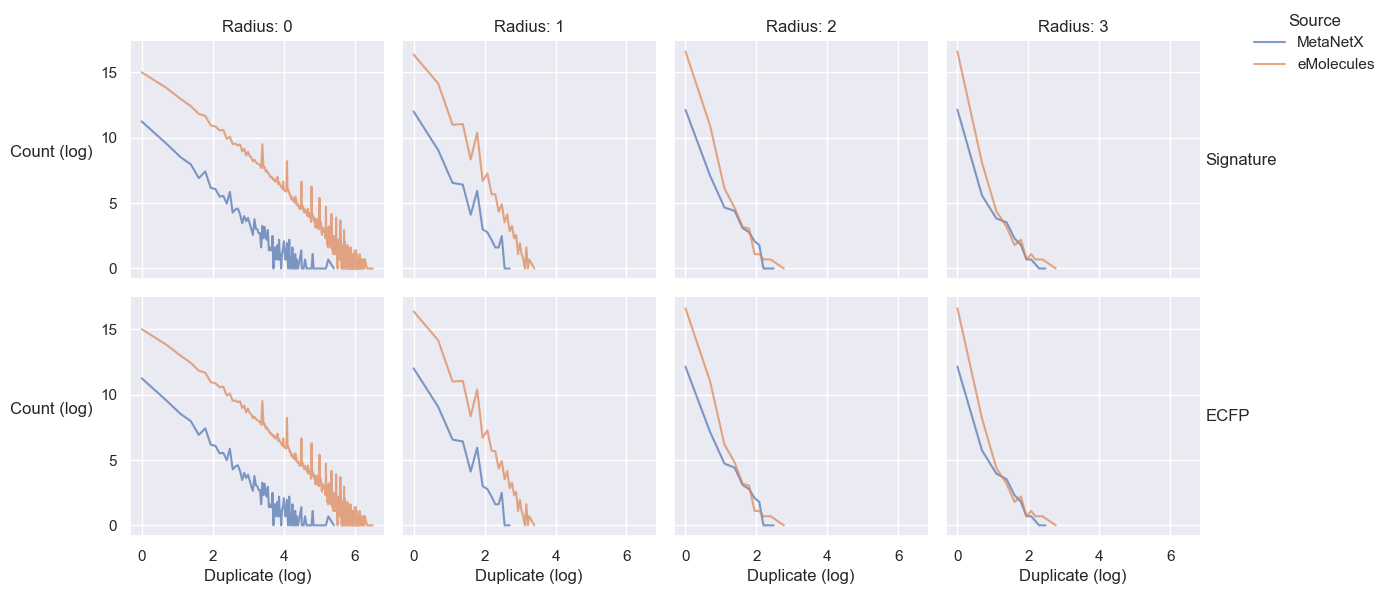

In [3]:
sns.set_theme(style="darkgrid")

"""
for radius in range(4):
    print("Radius:", radius)
    df_select = df[df["radius"] == radius]
    g = sns.FacetGrid(df_select, col="label", hue="src", margin_titles=True)
    g.map(sns.lineplot, "duplicate_log", "count_log", alpha=.7)
    g.add_legend()
"""
df_graph = df.copy()
df_graph.rename(columns={"radius": "Radius"}, inplace=True)

grid = sns.FacetGrid(df_graph, row="label", col="Radius", hue="src", margin_titles=True)
grid.map(sns.lineplot, "duplicate_log", "count_log", alpha=.7)
# Labels
grid.set_axis_labels("Duplicate (log)", "Count (log)")
grid.set_ylabels(rotation=0, labelpad=35)
grid.set_titles(row_template="{row_name}", col_template="{col_var}: {col_name}")
for text_annotation in grid._margin_titles_texts:
    text_annotation.set(rotation=0)
# Legend
grid.add_legend(title="Source", loc="upper right")
for text in grid.legend.get_texts():
    if text.get_text() == "metanetx":
        text.set_text("MetaNetX")
    elif text.get_text() == "emolecules":
        text.set_text("eMolecules")
#for ax in g.axes.flat:
#    ax.set_xlabels(rotation
    
plt.savefig("/Users/ggricourt/Documents/database/signature/degeneracy.png")

/var/folders/mc/1z49ft2n6z5d8x9bygps3prr0000gn/T/ipykernel_2697/3320654362.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collision_unique.drop(columns=["count_log", "count_origin"], inplace=True)
/var/folders/mc/1z49ft2n6z5d8x9bygps3prr0000gn/T/ipykernel_2697/3320654362.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collision_dup.drop(columns=["count_log", "count_origin"], inplace=True)
/var/folders/mc/1z49ft2n6z5d8x9bygps3prr0000gn/T/ipykernel_2697/3320654362.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.s

<Figure size 1200x600 with 0 Axes>

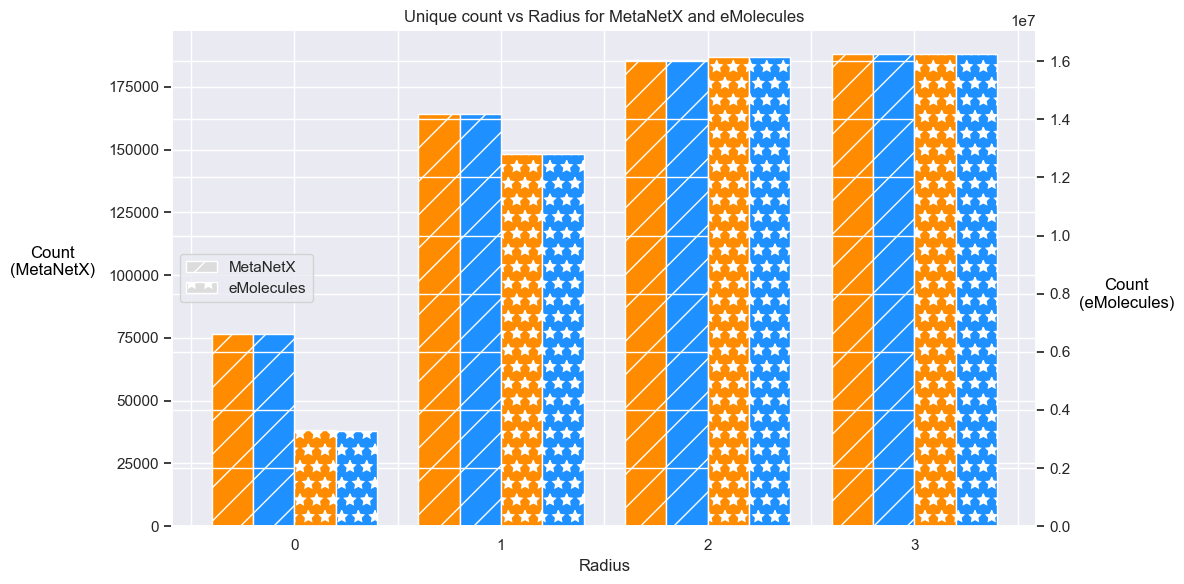

/var/folders/mc/1z49ft2n6z5d8x9bygps3prr0000gn/T/ipykernel_2697/3320654362.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels)


<Figure size 1200x600 with 0 Axes>

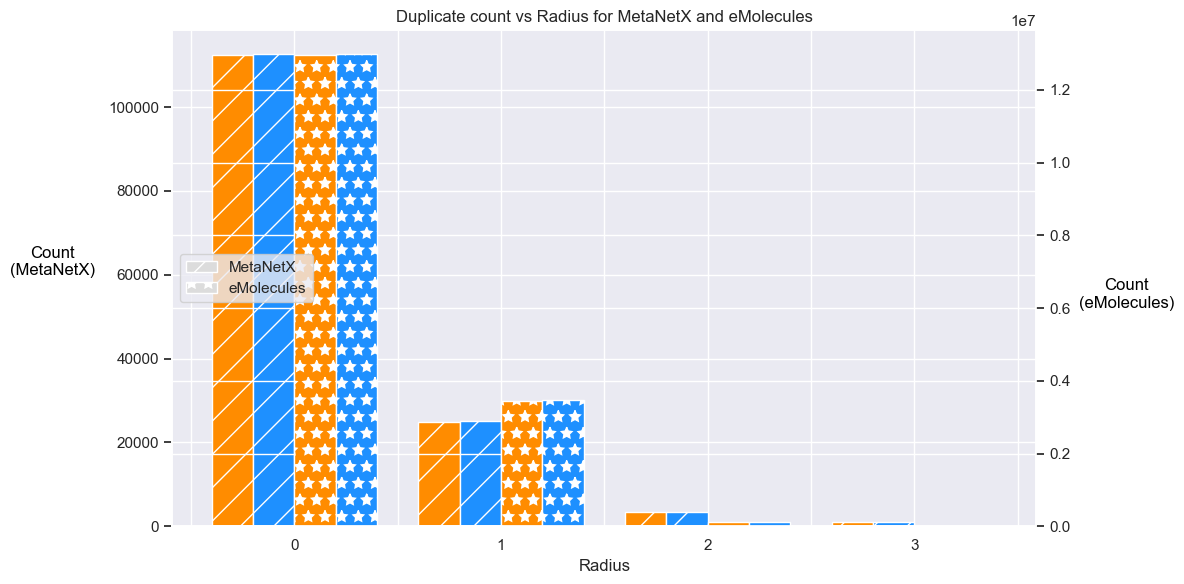

'\n# Common\ngrid.set_axis_labels("", "Count (log)")\ngrid.set_ylabels(rotation=0, labelpad=35)\ngrid.set_titles(row_template="{row_name}", col_template="{col_var}: {col_name}")\ngrid.set_xticklabels(labels=["Unique", "Duplicate"])\n'

In [44]:
df_hist = df.copy()

# Format
df_collision = pd.DataFrame()
for radius, src, label in itertools.product(list(range(4)), ["metanetx", "emolecules"], ["Signature", "ECFP"]):
    df_sub = df_hist[(df_hist["radius"] == radius) & (df_hist["src"] == src) & (df_hist["label"] == label)]

    data = {"radius": radius, "src": src, "label": label}
    count_duplicate = 0
    for row in df_sub.iterrows():
        if row[1]["duplicate"] == 1:
            res = {"count_origin": "unique", "count": row[1]["count"]}
            res.update(data)
            df_collision = pd.concat([df_collision, pd.DataFrame(res, index=[0])])
        else:
            count_duplicate += row[1]["duplicate"] * row[1]["count"]
    res = {"count_origin": "duplicate", "count": count_duplicate}
    res.update(data)

    df_collision = pd.concat([df_collision, pd.DataFrame(res, index=[0])])

#df_collision = df_collision[df_collision["src"] == "emolecules"]

df_collision["count_log"] = df_collision["count"].apply(lambda x: math.log(x) if x > 0 else 0)


# Graph
df_collision.rename(columns={"radius": "Radius"}, inplace=True)

df_collision_unique = df_collision[df_collision["count_origin"] == "unique"]
df_collision_unique.drop(columns=["count_log", "count_origin"], inplace=True)

df_collision_dup = df_collision[df_collision["count_origin"] != "unique"]
df_collision_dup.drop(columns=["count_log", "count_origin"], inplace=True)
"""
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}
"""
def plot_bar(df, title):

    df_pivot = df.pivot_table(values='count', index='Radius', columns=['label', 'src'], aggfunc='sum').reset_index()


    # Flatten the columns to make it easier to plot
    df_pivot.columns = ['Radius', 'ECFP_emolecules', 'ECFP_metanetx', 'Signature_emolecules', 'Signature_metanetx']
    
    # Plotting the data
    plt.figure(figsize=(12, 6))
    
    # Plot each set of bars
    x = df_pivot['Radius']
    # Create a figure and axis objects
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot the metanetx data on the primary y-axis (left)
    ax1.bar(x - 0.3, df_pivot['Signature_metanetx'], width=0.2, label='Signature Metanetx', color='darkorange', hatch='/')
    ax1.bar(x - 0.1, df_pivot['ECFP_metanetx'], width=0.2, label='ECFP Metanetx', color='dodgerblue', hatch='/')
    ax1.set_xlabel('Radius')
    ax1.set_ylabel('Count\n(MetaNetX)', color='black', rotation=0, labelpad=40)
    #ax1.tick_params(axis='y', labelcolor='black', labelrotation=0)
    
    # Mask intermediate x tick labels
    labels = []
    for x_tick_label in ax1.get_xticklabels():
        if x_tick_label.get_text() in ["0.0", "1.0", "2.0", "3.0"]:
            labels.append(str(int(float(x_tick_label.get_text()))))
        else:
            labels.append("")
    ax1.set_xticklabels(labels)
    # Create a second y-axis sharing the same x-axis for emolecules
    ax2 = ax1.twinx()
    ax2.bar(x + 0.1, df_pivot['Signature_emolecules'], width=0.2, label='Signature Emolecules', color='darkorange', hatch='*')
    ax2.bar(x + 0.3, df_pivot['ECFP_emolecules'], width=0.2, label='ECFP Emolecules', color='dodgerblue', hatch='*')
    ax2.set_ylabel('Count\n(eMolecules)', color='black', rotation=0, labelpad=40)
    #ax2.tick_params(axis='y', labelcolor='black', labelrotation=0)
    
    # Add title and adjust layout
    plt.title('%s count vs Radius for MetaNetX and eMolecules' % (title,))

    import matplotlib.patches as mpatches
    hd1 = mpatches.Patch(facecolor="#DCDCDC", hatch='/',label='MetaNetX')
    hd2 = mpatches.Patch(facecolor="#DCDCDC", hatch='*',label='eMolecules')
    ax2.legend(handles=[hd1, hd2], loc=6)

    fig.tight_layout()
    
    # Show the plot
    plt.show()


plot_bar(df_collision_unique, "Unique")
plot_bar(df_collision_dup, "Duplicate")

"""
grid = sns.catplot(df_collision, kind="bar", x="count_origin", y="count_log", col="Radius", hue="label", height=4, aspect=.5, legend=True)
grid.legend.set_title("")
"""

"""
grid = sns.FacetGrid(df_collision, col="Radius", row="label", margin_titles=True)
grid.map(sns.barplot, "count_origin", "count", order=["unique", "duplicate"], alpha=.7)
# Labels
for text_annotation in grid._margin_titles_texts:
    text_annotation.set(rotation=0)
"""

"""
# Common
grid.set_axis_labels("", "Count (log)")
grid.set_ylabels(rotation=0, labelpad=35)
grid.set_titles(row_template="{row_name}", col_template="{col_var}: {col_name}")
grid.set_xticklabels(labels=["Unique", "Duplicate"])
"""

#grid.savefig("/Users/ggricourt/Documents/database/signature/degeneracy.dedup.png")